In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("medical_examination.csv")

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Agregamos una columna de sobrepeso. Esta se obtiene calculando el IMC (peso en kg / (altura en m)^2):

In [5]:
imc = df["weight"]/(df["height"]/100)**(2)

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Indicamos sobrepeso como 1 (IMC>25) y no-sobrepeso con 0 (IMC<=25):

In [7]:
df.loc[imc <= 25, "overweight"]= 0

In [8]:
df.loc[imc>25, "overweight"] = 1

In [9]:
df["overweight"]=df["overweight"].astype('int8')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalizar los datos haciendo que 0 siempre sea bueno y 1 siempre sea malo. Si gluc o cholesterol son 1 cambiarlos por 0, y si son mayores que 1 cambiarlos por 1:

In [10]:
df.loc[df["gluc"]== 1 ,"gluc"] = 0
df.loc[df["gluc"] > 1 ,"gluc"] = 1
df.loc[df["cholesterol"]== 1 ,"cholesterol"] = 0
df.loc[df["cholesterol"] > 1 ,"cholesterol"] = 1

In [11]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Crear un data frame en formato long y crear un catplot con seaborn. el dataset debe separarse por cardio, de tal
manera que haya un chart por cada valor de cardio:


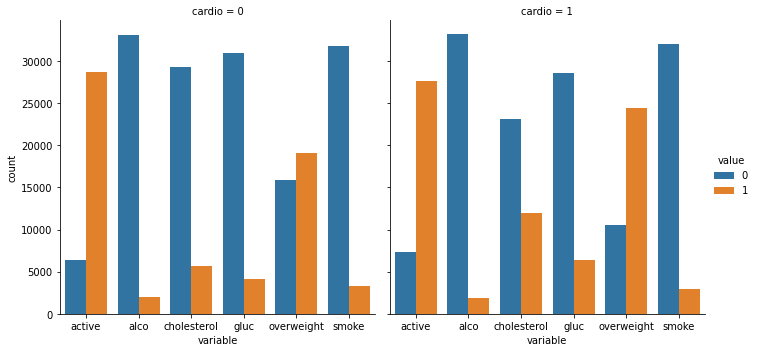

In [13]:
df_cat = pd.melt(df, id_vars="cardio", value_vars = ["active", 'alco','cholesterol', 'gluc', 'overweight', 'smoke'])
#df_cat.groupby("cardio")
fig1= sns.catplot(data=df_cat, kind="count",x="variable", col="cardio", hue="value")
#fig.set_axis_labels()
#def draw_cat_plot():
#    df_cat = pd.melt(df, id_vars="cardio", value_vars = ["active", 'alco','cholesterol', 'gluc', 'overweight', 'smoke'])
#    return sns.catplot(x="variable",kind= "count", col="cardio", hue="value", data= df_cat, legend=True).set_axis_labels('variable','total')
    #return df_cat.head()
#fig = draw_cat_plot()

In [14]:
fig1.savefig("catplot.png")

In [15]:
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


Limpiar el dataframe. Filtrar los siguientes segmentos de pacientes que representan datos incorrectos:

1.- Mantener aquellas filas tales que df["ap_lo"] <= df["ap_hi"]

In [13]:
data_filter = df[(df["ap_lo"]<=df["ap_hi"]) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) &
                                            (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
data_filter

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


Obtener una matriz de correlación para el dataframe anterior:

In [14]:
corr = data_filter.corr()
corr_rounded = corr.round(1)

In [15]:
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [16]:
corr_rounded
corr_rounded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, id to overweight
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           14 non-null     float64
 1   age          14 non-null     float64
 2   gender       14 non-null     float64
 3   height       14 non-null     float64
 4   weight       14 non-null     float64
 5   ap_hi        14 non-null     float64
 6   ap_lo        14 non-null     float64
 7   cholesterol  14 non-null     float64
 8   gluc         14 non-null     float64
 9   smoke        14 non-null     float64
 10  alco         14 non-null     float64
 11  active       14 non-null     float64
 12  cardio       14 non-null     float64
 13  overweight   14 non-null     float64
dtypes: float64(14)
memory usage: 2.2+ KB


In [17]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

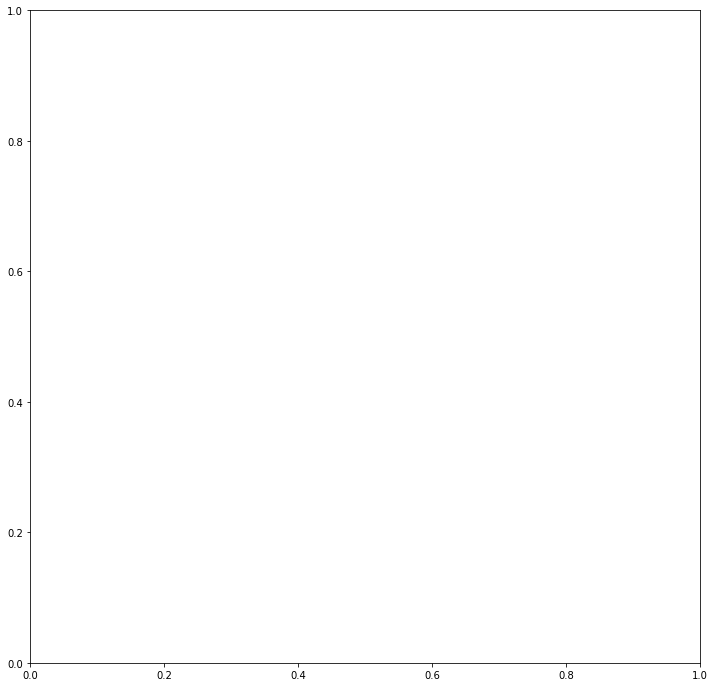

In [78]:
#gridspec_kws = {"width_ratios": (1, .04), "wspace":0.2}
#fig, (ax,cbar_ax) = plt.subplots(nrows=1, ncols=2,figsize=(12,12), gridspec_kw= gridspec_kws)
fig, ax = plt.subplots(figsize=(12,12))

In [79]:
#sns.heatmap(corr,square=True,ax=ax,cbar_ax=cbar_ax, xticklabels=True, yticklabels=True, annot=corr_rounded,fmt='.1f', annot_kws={"size": 12}, mask =mask, vmin= -0.2, vmax=0.7)
sns.heatmap(corr,square=True,ax=ax,cbar_kws={"shrink": 0.6, "extend":"both", "extendrect": True, "spacing": "proportional", "format": "%.2f"}, center=0, xticklabels=True, yticklabels=True, annot=corr_rounded,fmt='.1f', annot_kws={"size": 12}, mask =mask, vmin= -0.2, vmax=0.3)


<AxesSubplot:>

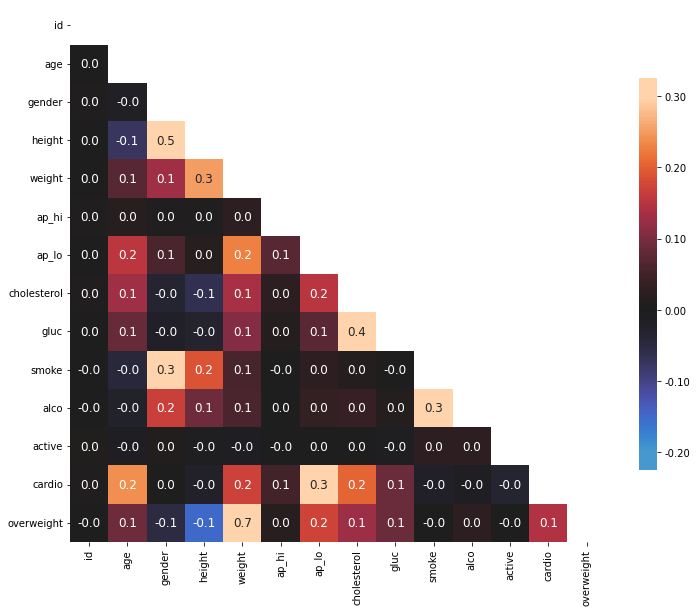

In [80]:
fig